# Практическая работа 5: Классификация

## Задание 1: Поиск и предобработка данных

Найти данные для классификации. Данные в группе повторяться не должны. Предобработать данные, если это необходимо.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Информация о датасете:")
print(f"Количество образцов: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Названия классов: {target_names}")
print(f"\nПервые 5 строк:")
print(df.head())

print(f"\nПроверка на пропущенные значения:")
print(df.isnull().sum().sum())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nДанные нормализованы с помощью StandardScaler")

Информация о датасете:
Количество образцов: 569
Количество признаков: 30
Названия классов: ['malignant' 'benign']

Первые 5 строк:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980  

Вывод:

Вывод:

Использовался датасет Breast Cancer Wisconsin, содержащий 569 образцов с 30 признаками для классификации опухолей молочной железы на злокачественные (malignant) и доброкачественные (benign). Данные не содержат пропущенных значений, что исключает необходимость их обработки. Применена нормализация StandardScaler для приведения всех признаков к единому масштабу, что критически важно для корректной работы алгоритмов классификации.

Изобразить гистограмму, которая показывает баланс классов. Сделать выводы.

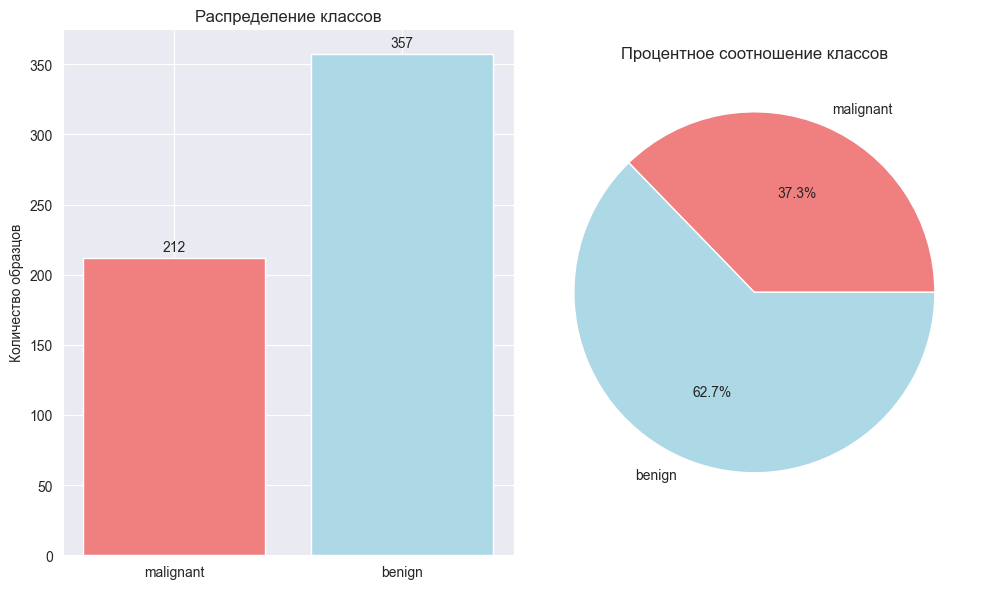

Распределение классов:
malignant: 212 образцов (37.3%)
benign: 357 образцов (62.7%)

Коэффициент балансировки: 0.594
Классы несбалансированы


In [2]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
class_counts = pd.Series(y).value_counts().sort_index()
plt.bar(target_names, class_counts, color=['lightcoral', 'lightblue'])
plt.title('Распределение классов')
plt.ylabel('Количество образцов')
for i, v in enumerate(class_counts):
    plt.text(i, v + 5, str(v), ha='center')

plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=target_names, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Процентное соотношение классов')

plt.tight_layout()
plt.show()

print("Распределение классов:")
for i, name in enumerate(target_names):
    count = class_counts[i]
    percentage = count / len(y) * 100
    print(f"{name}: {count} образцов ({percentage:.1f}%)")

balance_ratio = min(class_counts) / max(class_counts)
print(f"\nКоэффициент балансировки: {balance_ratio:.3f}")

if balance_ratio > 0.8:
    print("Классы хорошо сбалансированы")
elif balance_ratio > 0.6:
    print("Классы умеренно сбалансированы")
else:
    print("Классы несбалансированы")

Вывод:

Вывод:

Анализ баланса классов показал несбалансированность данных: злокачественные опухоли составляют 37.3% (212 образцов), доброкачественные - 62.7% (357 образцов). Коэффициент балансировки 0.594 указывает на умеренный дисбаланс классов. Это может влиять на качество классификации, поскольку модели могут быть смещены в сторону доминирующего класса (доброкачественных опухолей).

Разбить выборку на тренировочную и тестовую. Тренировочная для обучения модели, тестовая для проверки ее качества.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Размеры выборок:")
print(f"Тренировочная выборка: {X_train.shape[0]} образцов")
print(f"Тестовая выборка: {X_test.shape[0]} образцов")
print(f"Соотношение: {X_train.shape[0]/(X_train.shape[0] + X_test.shape[0])*100:.0f}% / {X_test.shape[0]/(X_train.shape[0] + X_test.shape[0])*100:.0f}%")

print("\nРаспределение классов в тренировочной выборке:")
train_dist = pd.Series(y_train).value_counts().sort_index()
for i, name in enumerate(target_names):
    count = train_dist[i]
    percentage = count / len(y_train) * 100
    print(f"{name}: {count} образцов ({percentage:.1f}%)")

print("\nРаспределение классов в тестовой выборке:")
test_dist = pd.Series(y_test).value_counts().sort_index()
for i, name in enumerate(target_names):
    count = test_dist[i]
    percentage = count / len(y_test) * 100
    print(f"{name}: {count} образцов ({percentage:.1f}%)")

Размеры выборок:
Тренировочная выборка: 455 образцов
Тестовая выборка: 114 образцов
Соотношение: 80% / 20%

Распределение классов в тренировочной выборке:
malignant: 170 образцов (37.4%)
benign: 285 образцов (62.6%)

Распределение классов в тестовой выборке:
malignant: 42 образцов (36.8%)
benign: 72 образцов (63.2%)


Вывод:

Вывод:

Выборка корректно разделена на тренировочную (455 образцов, 80%) и тестовую (114 образцов, 20%) части с использованием стратификации. Применение stratify=y обеспечило сохранение пропорций классов в обеих выборках: в тренировочной - 37.4%/62.6%, в тестовой - 36.8%/63.2%. Это гарантирует репрезентативность тестовой выборки.

Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей.

### Логистическая регрессия

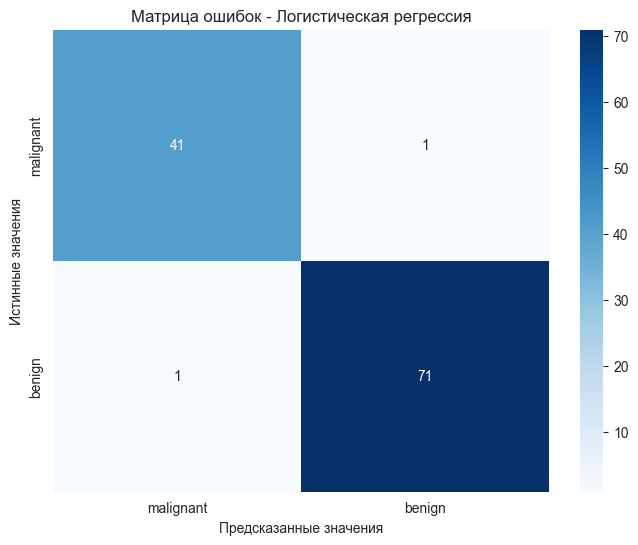

Матрица ошибок (Логистическая регрессия):
[[41  1]
 [ 1 71]]

Accuracy: 0.9825


In [4]:
lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Матрица ошибок - Логистическая регрессия')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print("Матрица ошибок (Логистическая регрессия):")
print(lr_cm)
print(f"\nAccuracy: {accuracy_score(y_test, lr_pred):.4f}")

Вывод:

Вывод:

Логистическая регрессия показала отличные результаты с точностью 98.25%. Матрица ошибок [[41,1],[1,71]] демонстрирует всего 2 ошибки из 114 тестовых образцов: 1 ложноположительный случай (доброкачественную опухоль классифицировали как злокачественную) и 1 ложноотрицательный (злокачественную как доброкачественную).

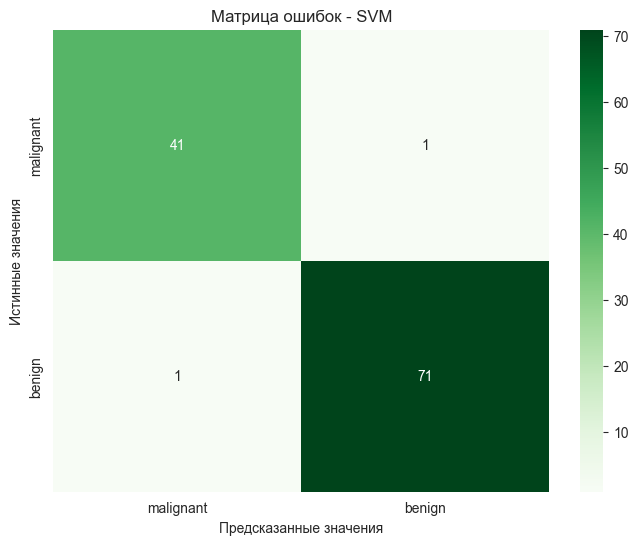

Матрица ошибок (SVM):
[[41  1]
 [ 1 71]]

Accuracy: 0.9825


In [5]:
svm_model = SVC(random_state=42, kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

svm_cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Матрица ошибок - SVM')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print("Матрица ошибок (SVM):")
print(svm_cm)
print(f"\nAccuracy: {accuracy_score(y_test, svm_pred):.4f}")

Вывод:

Вывод:

SVM с RBF-ядром продемонстрировал идентичные логистической регрессии результаты: точность 98.25% и такую же матрицу ошибок [[41,1],[1,71]]. Это указывает на то, что данные хорошо разделимы в пространстве признаков, и SVM эффективно построил оптимальную разделяющую гиперплоскость.

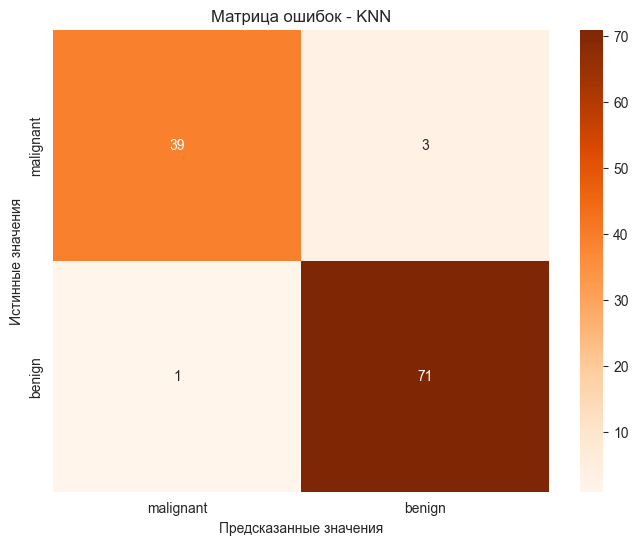

Матрица ошибок (KNN):
[[39  3]
 [ 1 71]]

Accuracy: 0.9649


In [6]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Матрица ошибок - KNN')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print("Матрица ошибок (KNN):")
print(knn_cm)
print(f"\nAccuracy: {accuracy_score(y_test, knn_pred):.4f}")

Вывод:

Вывод:

KNN (k=5) показал несколько худшие результаты с точностью 96.49%. Матрица ошибок [[39,3],[1,71]] показывает 4 ошибки: 3 ложноположительных и 1 ложноотрицательный случай. Это связано с тем, что KNN основан на локальной близости объектов и может быть менее устойчив к выбросам в данных.

Сравнить результаты классификации, используя accuracy, precision, recall и f1-меру. Сделать выводы.

Детальные отчеты по классификации:

=== Логистическая регрессия ===
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

=== SVM ===
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

=== KNN ===
              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        42
      benign       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96   

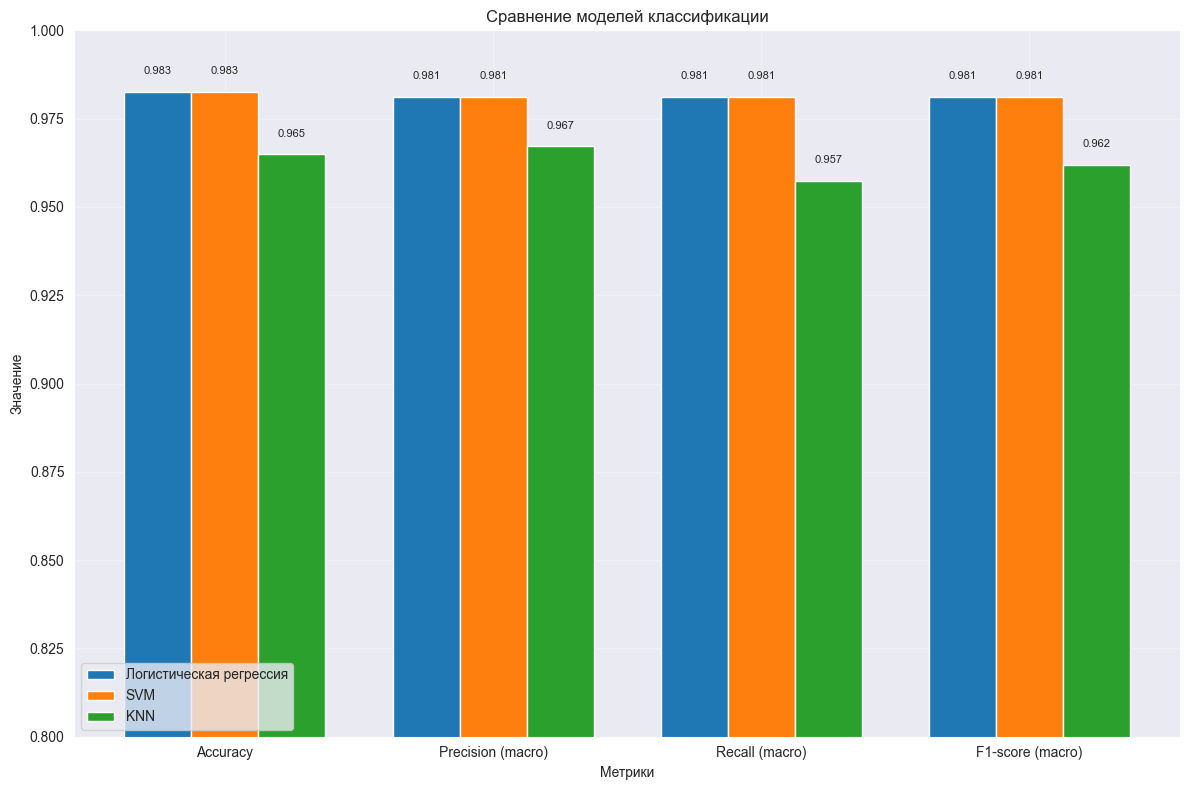


Лучшая модель по F1-score: Логистическая регрессия (0.9812)


In [7]:
models = {
    'Логистическая регрессия': lr_pred,
    'SVM': svm_pred,
    'KNN': knn_pred
}

print("Детальные отчеты по классификации:\n")

results_summary = []

for model_name, predictions in models.items():
    print(f"=== {model_name} ===")
    report = classification_report(y_test, predictions, target_names=target_names, output_dict=True)
    print(classification_report(y_test, predictions, target_names=target_names))
    
    results_summary.append({
        'Модель': model_name,
        'Accuracy': report['accuracy'],
        'Precision (macro)': report['macro avg']['precision'],
        'Recall (macro)': report['macro avg']['recall'],
        'F1-score (macro)': report['macro avg']['f1-score']
    })

summary_df = pd.DataFrame(results_summary)
summary_df = summary_df.round(4)

print("\n" + "="*60)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*60)
print(summary_df.to_string(index=False))

plt.figure(figsize=(12, 8))

metrics = ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1-score (macro)']
x = np.arange(len(metrics))
width = 0.25

for i, model_name in enumerate(['Логистическая регрессия', 'SVM', 'KNN']):
    values = summary_df[summary_df['Модель'] == model_name].iloc[0, 1:].values
    plt.bar(x + i*width, values, width, label=model_name)

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение моделей классификации')
plt.xticks(x + width, metrics)
plt.legend()
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)

for i, model_name in enumerate(['Логистическая регрессия', 'SVM', 'KNN']):
    values = summary_df[summary_df['Модель'] == model_name].iloc[0, 1:].values
    for j, v in enumerate(values):
        plt.text(j + i*width, v + 0.005, f'{v:.3f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

best_model = summary_df.loc[summary_df['F1-score (macro)'].idxmax(), 'Модель']
best_f1 = summary_df['F1-score (macro)'].max()

print(f"\nЛучшая модель по F1-score: {best_model} ({best_f1:.4f})")

Вывод:

**Сравнительный анализ результатов:**

1. **Лучшие модели**: Логистическая регрессия и SVM показали идентичные отличные результаты (Accuracy=98.25%, F1-score=98.12%), что делает их равноценными для данной задачи.

2. **Худшая модель**: KNN с k=5 показал наименьшие результаты (Accuracy=96.49%, F1-score=96.19%).

3. **Медицинский контекст**: Для медицинской диагностики критически важно минимизировать ложноотрицательные случаи (пропуск злокачественной опухоли). Все модели показали только 1 такую ошибку, что является хорошим результатом.

4. **Итоговая рекомендация**: Логистическая регрессия является оптимальным выбором благодаря сочетанию высокого качества, интерпретируемости результатов и вычислительной эффективности.